## FinalProject_MLModel_2ndSegment

This project is about predicting housing prices across various regions/Zipcodes in the country based on various market factors such as gas prices, unemployment rate, mortgage rates, interest rates, and inflation rates. We will be utilizing supervised machine learning models for this purpose.

In [1]:
# Import denpendencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn.metrics import mean_squared_error, r2_score
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn import linear_model 
import statsmodels.api as sm

In [2]:
# Upload the CSV files 
file_load = "Resources/full_data_set_zipcodes.csv"
df = pd.read_csv(file_load)
df.head()

,DATE,PRICE_PER_GALLON,UNEMPLOYMENT_RATE,AVG_MORTGAGE_RATE,INTEREST_RATES,INFLATION,10001,60601,89101,75201,...,19468,32550,96738,76262,85641,34228,18938,95223,19047,60081
0,2011-01-01,3.148,9.1,4.8,0.17,220.223,462700.0,188500.0,115600.0,191900.0,...,229700.0,284400.0,237800.0,128400.0,204100.0,432300.0,528100.0,266300.0,272300.0,203600.0
1,2011-02-01,3.264,9.0,4.9,0.16,221.309,466200.0,189400.0,114000.0,184500.0,...,216700.0,258100.0,216000.0,148400.0,194000.0,476900.0,482600.0,244200.0,291500.0,175600.0
2,2011-03-01,3.615,9.0,5.0,0.14,223.467,465600.0,186300.0,110800.0,174500.0,...,199800.0,253800.0,208800.0,150500.0,192400.0,440900.0,454800.0,217800.0,305600.0,170200.0
3,2011-04-01,3.852,9.1,4.9,0.10,224.906,469500.0,177700.0,109600.0,152000.0,...,211500.0,225700.0,229800.0,161600.0,185900.0,457500.0,463300.0,191200.0,342300.0,184800.0
4,2011-05-01,3.960,9.0,4.9,0.09,225.964,471300.0,167900.0,108200.0,162900.0,...,215300.0,230800.0,260100.0,131500.0,175900.0,470600.0,475400.0,201500.0,342600.0,198900.0


### Preliminary Data Preprocessing
Data utilized for this project was obtained from six different sources. All sources are listed and linked in the project README.md file on the github repository.
Data preprocessing was conducted in a separate jupyter notebook: [Preprocessing Notebook.ipynb](https://github.com/pbthompson92/Final_Project_Outliers/blob/main/preprocessing_4a_adding_additional_datasets_by_zipcodes.ipynb)

As is clear from the notebook referenced above, we have created our final dataset by combining Housing prices across the country with gas prices dataset, unemployment rates dataset, mortgage rates dataset, federal interest rates dataset, and CPI inex dataset which depicts inflation in the country.

We followed the following steps to accomplish data pre-processing:
- Import the libraries
- Import the Dataset
- Check the missing values
- Splitting the dataset into trainig and testing set
- Feature scaling: is a method used to normalize the range of independent variables or features of data. So when the values vary a lot in an independent variable, we use feature scaling so that all the values remain in the comparable range. The variations in our dataset can be minimized simply by dividing the house prices by 1000.


In [3]:
# Check the data types of each column 
df.dtypes

DATE                  object
PRICE_PER_GALLON     float64
UNEMPLOYMENT_RATE    float64
AVG_MORTGAGE_RATE    float64
INTEREST_RATES       float64
                      ...   
34228                float64
18938                float64
95223                float64
19047                float64
60081                float64
Length: 953, dtype: object

In [4]:
# Check number of columns in the dataframe
len(df.columns)

953

There are a total of 953 columns, out of which 6 are independent variables and remaining 947 are the housing prices in various regions in the country denoted by different Zipcodes. The housing prices in each region is our dependent variable.

In [5]:
# Dropping DATE column 
df.drop(columns="DATE", axis=1, inplace=True)
df.head()

,PRICE_PER_GALLON,UNEMPLOYMENT_RATE,AVG_MORTGAGE_RATE,INTEREST_RATES,INFLATION,10001,60601,89101,75201,43085,...,19468,32550,96738,76262,85641,34228,18938,95223,19047,60081
0,3.148,9.1,4.8,0.17,220.223,462700.0,188500.0,115600.0,191900.0,89100.0,...,229700.0,284400.0,237800.0,128400.0,204100.0,432300.0,528100.0,266300.0,272300.0,203600.0
1,3.264,9.0,4.9,0.16,221.309,466200.0,189400.0,114000.0,184500.0,86000.0,...,216700.0,258100.0,216000.0,148400.0,194000.0,476900.0,482600.0,244200.0,291500.0,175600.0
2,3.615,9.0,5.0,0.14,223.467,465600.0,186300.0,110800.0,174500.0,79800.0,...,199800.0,253800.0,208800.0,150500.0,192400.0,440900.0,454800.0,217800.0,305600.0,170200.0
3,3.852,9.1,4.9,0.10,224.906,469500.0,177700.0,109600.0,152000.0,79300.0,...,211500.0,225700.0,229800.0,161600.0,185900.0,457500.0,463300.0,191200.0,342300.0,184800.0
4,3.960,9.0,4.9,0.09,225.964,471300.0,167900.0,108200.0,162900.0,78600.0,...,215300.0,230800.0,260100.0,131500.0,175900.0,470600.0,475400.0,201500.0,342600.0,198900.0


### Multiple Linear Regression Model
Our problem statement involves predicting housing values. This problem can be solved by using a regression model. Multiple Linear Regression (MLR) is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variables.
Multiple regressions are based on the assumption that there is a linear relationship between both the dependent and independent variables. It also assumes no major correlation between the independent variables.

### Check for Linearity
In order for the MLR model to be applicable we want to check that a linear relationship exists between the dependent variable and the independent variables. This can be checked by using scatter plots.

In [6]:
# Enter the zipcode to build the model. Example: 10001 etc. 
# As Mentioned above, this model has 947 different zipcodes to choose from.
region = input("Enter the 5 digit Zipcode: ")

Enter the 5 digit Zipcode: 75201


Text(0.5, 1.0, 'Inflation vs Housing')

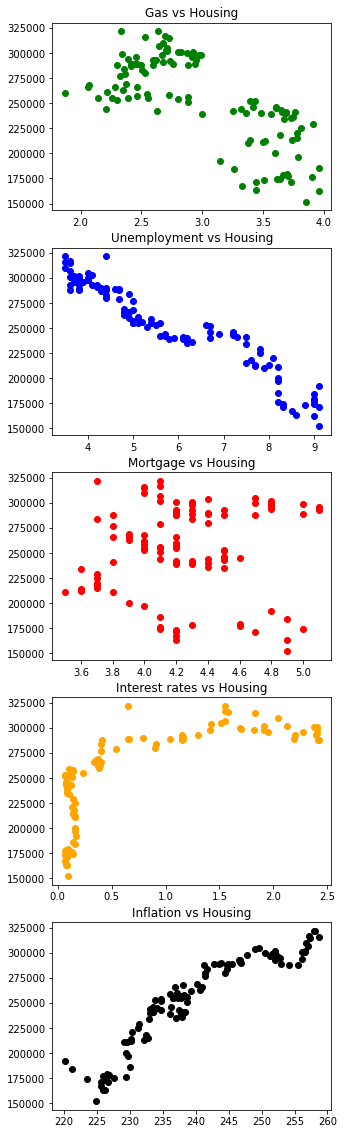

In [7]:
# Plot the code 
fig, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(5,1,figsize = (5,20))
ax1.scatter(df["PRICE_PER_GALLON"],df[region], c="green")
ax1.set_title('Gas vs Housing')
ax2.scatter(df["UNEMPLOYMENT_RATE"], df[region], c="blue")
ax2.set_title('Unemployment vs Housing')
ax3.scatter(df["AVG_MORTGAGE_RATE"],df[region], c="red")
ax3.set_title('Mortgage vs Housing')
ax4.scatter(df["INTEREST_RATES"], df[region], c="orange")
ax4.set_title('Interest rates vs Housing')
ax5.scatter(df["INFLATION"], df[region], c="black")
ax5.set_title('Inflation vs Housing')

### Feature Engineering

Feature engineering is a process of extracting useful features from raw data using math, statistics and domain knowledge. For our project we started the process of feature engineering early on by detecting missing values and removing them from the dataset. Additionally during preprocessing, we added zipcodes as a feature to our dataset by matching each region ID against the respective zip codes.

(Maybe Outlier detection??)

### Feature Selection 
In our dataset, we have 5 input features (Gas Prices, Mortgage rates, Interest rates, Inflation and Unemployment rates) for our model. We are trying to visualize a correlation between these 5 features and the housing prices which is our target value in this machine learning model. 

Based on the above scatter plots, we can see that Interest Rates and Inflation (Consumer Price Index - CPI) have a linear relationship with Housing Prices. The Gas Prices and Unemployment Rates also have a linear relationship with Housing Prices, but with a negatice slope, whihc means that housing prices decrease with increasing as prices and unemployment rates. We can also see that Mortage rates do not have a linear relationship with Housing Prices. 
Since Mortgage Rates and Housing Prices do not have linear relationship, in order to move forward with MLR model, we decided to drop Mortage Rates feature from our dataset. 

In [8]:
# Droping Mortgage Rates
df2 = df.drop(columns="AVG_MORTGAGE_RATE", axis=1)
df2.head()

,PRICE_PER_GALLON,UNEMPLOYMENT_RATE,INTEREST_RATES,INFLATION,10001,60601,89101,75201,43085,40202,...,19468,32550,96738,76262,85641,34228,18938,95223,19047,60081
0,3.148,9.1,0.17,220.223,462700.0,188500.0,115600.0,191900.0,89100.0,125900.0,...,229700.0,284400.0,237800.0,128400.0,204100.0,432300.0,528100.0,266300.0,272300.0,203600.0
1,3.264,9.0,0.16,221.309,466200.0,189400.0,114000.0,184500.0,86000.0,124000.0,...,216700.0,258100.0,216000.0,148400.0,194000.0,476900.0,482600.0,244200.0,291500.0,175600.0
2,3.615,9.0,0.14,223.467,465600.0,186300.0,110800.0,174500.0,79800.0,118300.0,...,199800.0,253800.0,208800.0,150500.0,192400.0,440900.0,454800.0,217800.0,305600.0,170200.0
3,3.852,9.1,0.10,224.906,469500.0,177700.0,109600.0,152000.0,79300.0,117600.0,...,211500.0,225700.0,229800.0,161600.0,185900.0,457500.0,463300.0,191200.0,342300.0,184800.0
4,3.960,9.0,0.09,225.964,471300.0,167900.0,108200.0,162900.0,78600.0,113800.0,...,215300.0,230800.0,260100.0,131500.0,175900.0,470600.0,475400.0,201500.0,342600.0,198900.0


In [9]:
# Check all maximum values for each column

max_elements = df2.max(axis=0)
print(max_elements)

PRICE_PER_GALLON          3.960
UNEMPLOYMENT_RATE         9.100
INTEREST_RATES            2.420
INFLATION               258.678
10001                575100.000
                        ...    
34228                663200.000
18938                665600.000
95223                345100.000
19047                416200.000
60081                270300.000
Length: 951, dtype: float64


In [10]:
# Create Feature and Target variable
X1 = df2.copy()
X1 = X1[["PRICE_PER_GALLON", "UNEMPLOYMENT_RATE", "INTEREST_RATES", "INFLATION"]]

y1 = (df2[region]/1000).values.reshape(-1,1)


In [11]:
# Structure of X and y
print(X1.shape)
print(y1.shape)

(111, 4)
(111, 1)


In [12]:
# Columns 
columns = df2.columns.tolist()
columns[:5]

['PRICE_PER_GALLON',
 'UNEMPLOYMENT_RATE',
 'INTEREST_RATES',
 'INFLATION',
 '10001']

### Splitting data into Training and Testing Sets
We used the Python Scikitlearn's train_test_split function to split our data into training and testing sets for model performance evaluation. This is done by importing train_test_split from sklearn.model_selection. By default this function alots 25% of the dataset as the testing set.

In [13]:
# Train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)
X1_train.head()

,PRICE_PER_GALLON,UNEMPLOYMENT_RATE,INTEREST_RATES,INFLATION
15,3.958,8.2,0.14,230.085
44,3.484,5.9,0.09,238.031
89,2.970,4.0,1.82,251.989
90,2.928,3.8,1.91,252.006
9,3.506,8.8,0.07,226.421


### Performong the Multiple Linear Regression

In [14]:
# Model 
model = LinearRegression()

#Fit the model 
model.fit(X1_train, y1_train)
print(f"Intercept: {model.intercept_}")
Coeff = model.coef_
print(f"Coefficients: {Coeff}")

predictions = model.predict(X1_test)


Intercept: [-329.60769479]
Coefficients: [[ -3.44203982 -11.70529052 -12.53273724   2.7904073 ]]


In [15]:
# Model Evaluation with RMSE, R2 and adjusted R2
MSE = round(mean_squared_error(y1_test,predictions), 2)
print("MSE: ", MSE)

RMSE = round(np.sqrt(mean_squared_error(y1_test,predictions)), 2)
print("RMSE: ", RMSE)

R2 = round(model.score(X1_test, y1_test), 2)
print("R2: ", R2)

adj_R2 = round(1 - (1-model.score(X1_test, y1_test))*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1), 2)
print("adjusted R2: ", adj_R2)

MSE:  174.48
RMSE:  13.21
R2:  0.91
adjusted R2:  0.9


In [16]:
# To predict data 
# prediction with sklearn

NEW_PRICE_PER_GALLON = 4.10
NEW_UNEMPLOYMENT_RATE = 9.3
NEW_INTEREST_RATES = 2.6
NEW_INFLATION = 275.0
Predicted_HP = (1000*model.predict([[NEW_PRICE_PER_GALLON, NEW_UNEMPLOYMENT_RATE, 
                                           NEW_INTEREST_RATES, NEW_INFLATION ]]))
print('Predicted Housing Price: \n $', round(Predicted_HP[0][0], 2))

Predicted Housing Price: 
 $ 282197.63


/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
# Create DataFrame with required values for each region
# assign data of lists.  
data = {'INTERCEPT': model.intercept_, 'Coefficient_1': Coeff[0][0], 'Coefficient_2': Coeff[0][1], 
        'Coefficient_3': Coeff[0][2], 'Coefficient_4': Coeff[0][3], 'MSE':[MSE], 'RMSE':[RMSE], 
        'R2': [R2], 'ADJ R2': [adj_R2]}  
  
# Creates pandas DataFrame.  
model_output_df = pd.DataFrame(data, index =[region])  
  
# Check output dataframe  
model_output_df  

,INTERCEPT,Coefficient_1,Coefficient_2,Coefficient_3,Coefficient_4,MSE,RMSE,R2,ADJ R2
75201,-329.607695,-3.44204,-11.705291,-12.532737,2.790407,174.48,13.21,0.91,0.9


### We will use statsmodel to generate comprehensive table with statistical info about our model

In [18]:
# Statistical info with statsmodels
X1 = sm.add_constant(X1) # adding a constant
 
model_2 = sm.OLS(y1_train, X1_train).fit()
  
print_model = model_2.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.204e+04
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                   3.68e-109
Time:                        20:38:46   Log-Likelihood:                         -312.55
No. Observations:                  83   AIC:                                      633.1
Df Residuals:                      79   BIC:                                      642.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Notice that the coefficients captured in this table match with the coefficients generated by sklearn.

In [19]:
model_2.rsquared_adj

0.9982797405577255

## Graphical User Interface (GUI) 
Now creating a GUI that will allow users to input the independent variables in order to get the predicted result

In [20]:
#from tkinter import ttk

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', model.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', model.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)


# New_Gas_Price label and input box
label1 = tk.Label(root, text='Type Gas Price: ')
canvas1.create_window(100, 60, window=label1)

entry1 = tk.Entry(root) # create 1st entry box
canvas1.create_window(300, 60, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text='Type Unemployment Rate: ')
canvas1.create_window(100, 80, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(300, 80, window=entry2)

# New_Interest_Rate label and input box
label3 = tk.Label(root, text='Type Interest Rate: ')
canvas1.create_window(100, 100, window=label3)

entry3 = tk.Entry(root) # create 1st entry box
canvas1.create_window(300, 100, window=entry3)

# New_Inflation label and input box
label4 = tk.Label(root, text='Type Inflation: ')
canvas1.create_window(100, 120, window=label4)

entry4 = tk.Entry(root) # create 2nd entry box
canvas1.create_window(300, 120, window=entry4)


def values(): 
    global New_Gas_Price #our 1st input variable
    New_Gas_Price = (entry1.get()) 
    
    global New_Unemployment_Rate #our 2nd input variable
    New_Unemployment_Rate = (entry2.get()) 
    
    global New_Interest_Rate #our 3rd input variable
    New_Interest_Rate = (entry3.get()) 
    
    global New_Inflation #our 4th input variable
    New_Inflation = (entry4.get()) 
    
    Prediction_result  = ('Housing Price: ', model.predict([[New_Gas_Price,New_Unemployment_Rate, 
                                                             New_Interest_Rate, New_Inflation]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Housing Price',command=values, bg='#54FA9B') # button to call the 'values' command above 
canvas1.create_window(300, 150, window=button1)
 
#plot 1st scatter 
figure1 = plt.Figure(figsize=(5,4), dpi=100)
ax1 = figure1.add_subplot(111)
ax1.scatter(df['PRICE_PER_GALLON'].astype(float),df[region].astype(float), color = 'r')
scatter1 = FigureCanvasTkAgg(figure1, root) 
scatter1.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax1.legend(["Region"]) 
ax1.set_xlabel('Gas Price')
ax1.set_title('Gas Price Vs. Housing Price')

#plot 2nd scatter 
figure2 = plt.Figure(figsize=(5,4), dpi=100)
ax2 = figure2.add_subplot(111)
ax2.scatter(df['UNEMPLOYMENT_RATE'].astype(float),df[region].astype(float), color = 'g')
scatter2 = FigureCanvasTkAgg(figure2, root) 
scatter2.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax2.legend(["Region"]) 
ax2.set_xlabel('Unemployment Rate')
ax2.set_title('Unemployment Rate Vs. Housing Price')

#plot 3rd scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['INTEREST_RATES'].astype(float),df[region].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Region']) 
ax3.set_xlabel('Interest Rate')
ax3.set_title('Interest Rate Vs. Housing Price')

#plot 4th scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['INFLATION'].astype(float),df[region].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(["Region"]) 
ax4.set_xlabel('Inflation')
ax4.set_title('Inflation (CPI) Vs. Housing Price')

root.mainloop()

Once you run the code, you’ll see this GUI, which includes the output generated by sklearn and the scatter diagrams for the selected Zipcode.

### Random Forest Regressor Model

In [23]:
# importing dependencies for Random Forest Model

from sklearn.ensemble import RandomForestRegressor

In [24]:
# Define the features and the target from the original dataframe
X2 = df.copy()
X2 = X2[["PRICE_PER_GALLON", "UNEMPLOYMENT_RATE", "AVG_MORTGAGE_RATE", "INTEREST_RATES", "INFLATION"]]

y2 = (df[region]/1000).values.reshape(-1,1)

In [30]:
# Split the data into training and testing set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)

In [31]:
modelRF = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [32]:
modelRF.fit(X2_train, y2_train)

/var/folders/c5/q0vj7mks1cn6d10bp2s_sk0w0000gn/T/ipykernel_27016/3858015664.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRF.fit(X2_train, y2_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [33]:
# Prediction
prediction2 = modelRF.predict(X2_test)

In [34]:
# Check the difference between actual and predicted values
modelRF_df=pd.DataFrame({'Actual':y2_test, 'Predicted':prediction2})
modelRF_df.head()

ValueError: Data must be 1-dimensional

In [ ]:
# Create the function 
# def RegressionModel():
#     y = df[city]/1000
        
    
#     # Train the datasets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
#     # Create a model 
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     training_score = model.score(X_train, y_train)
#     testing_score = model.score(X_test, y_test)
#     print(f"Training Score: {training_score}.")
#     print(f"Testing Score: {testing_score}.")
#     print(f"--------------------------------")
    
#     # Predict the model 
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f"Coefficient of the model: {model.coef_}")              
#     print(f"Model Intercept: {model.intercept_}.")
#     print(f"----------------------------------")
#     print(f"mean squared error (MSE): {mse}")
#     print(f"R-squared (R2 ): {r2}")
    
#     # Visualize the plot 
#     plt.scatter(model.predict(X_train), model.predict(X_train)- y_train, c="blue", label="Training Date")
#     plt.scatter(model.predict(X_test), model.predict(X_test)-y_test, c="orange", label="Testing Data")
#     plt.legend()
#     plt.title("Multivariant Regression on Housing")
#     plt.show()   
    
#     # Min and Max values of each city Housing Price
#     x_min = X_test.min()
#     x_max = X_test.max()
# #     y_min = model.predict(x_min)
# #     y_max = model.predict(x_max)
#     print(f"------------------------------------------------")
#     print(f"Min Inflation: ${x_min}, Max Inflation: ${x_max}")
# #     print(f"Predicted Mix Housing Price: ${y_min*1000}, Predicted Max Housing Price ${y_max*1000}.")
        
#     return   

In [ ]:
# Enter the city name 
# city = input("Enter the City Name: ")
# RegressionModel()

In [ ]:
# Standardize the data
# scaler = StandardScaler()

# # Fit the model 
# X_scaled = scaler.fit(X_train)

# # Scale the model 
# X_train_scaled = X_scaled.transform(X_train)
# X_test_scaled = X_scaled.transform(X_test)

In [ ]:
# Random Forest model 

# # Create a random forest model 
# rf_model = RandomForestClassifier(n_estimators=128, random_state=42)

# # fit the model 
# rf_model = rf_model.fit(X_train_scaled, y_train)

# # Making predictions using testing data
# predictions = rf_model.predict(X_test_scaled)

In [ ]:
# # Calculating the accuracy score
# acc_score = accuracy_score(y_test, predictions)
# acc_score
X_train_scaled[:5]

## Deep Learning Model 

In [ ]:
# Define the model - deep neural net
# number_input_features = len(X_train_scaled[0])
# hidden_nodes_layer1 = 20
# hidden_nodes_layer2 = 10
# hidden_nodes_layer3 = 5

# nn = tf.keras.models.Sequential()

# # First hidden layer
# nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer1, input_dim = number_input_features, activation="relu"))

# nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer2, activation="relu"))

# nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer3, activation="relu"))

# nn.add(tf.keras.layers.Dense(units= 1, activation="sigmoid"))

# # Compile the model 
# nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# # Train the model 
# fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# # Evaluate the model using the test data 
# model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


In [ ]:
# Create the model of linear regreession on NY city housing data
# model = LinearRegression()

# # Fit the model 
# model.fit(X, y)

In [ ]:
# Predict the y 
# y_pred = model.predict(X)
# y_pred[:5]

In [ ]:
# Visualize the data 
# plt.scatter(X, y)
# plt.plot(X, y_pred, color="red")
# plt.show()

## Quantifying the model

In [ ]:
# Score the prediction with MSE and R2
# from sklearn.metrics import r2_score, mean_squared_error

# mse = mean_squared_error(y, y_pred)
# r2 = r2_score(y, y_pred)

# print(f"Mean Squared Error (MSE): {round(mse, 2)}")
# print(f"R-squared (R2): {round(r2, 4)}")

In [ ]:
# Overall score of the model 
# model_score = model.score(X, y)
# model_score

## Model Validation 

In [ ]:
# Testing and Training data 
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# # Fit the model using training data
# model.fit(X_train, y_train)

In [ ]:
# Score the model using the unseen testing data
# model.score(X_test, y_test)

In [ ]:
# fig, ax = plt.subplots()
# plt.scatter(model.predict(X_train), model.predict(X_train)- y_train, c="blue", label="Training Date")
# plt.scatter(model.predict(X_test), model.predict(X_test)-y_test, c="orange", label="Testing Data")
# plt.boxplot(predictions, labels=["NY"])
# plt.title("Multivariant Regression on Housing")
# plt.legend()
# plt.grid()
# plt.show()